In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.regression.mixed_linear_model as mix

In [4]:
# Load the Excel file
file_path = '/Users/c3495249/Library/CloudStorage/OneDrive-TheUniversityofNewcastle/Data/Thermometry/Calibration_literature_data/Calibration_Data_Summary_Updated_2.xlsx'

In [7]:
# Read the first sheet into a DataFrame
df = pd.read_excel(file_path, sheet_name=0)
data = df[['Alpha (α)', 'Beta (β)', 'NAA (mM)', 'Protein BSA (%) W/V', 'Study']].dropna()

In [33]:
# Select relevant columns and rename them for convenience
data = df[['Alpha (α)', 'Beta (β)', 'NAA (mM)', 'Protein BSA (%) W/V', 'Study']].dropna()

# Define the predictors and target variables
X = data[['NAA (mM)', 'Protein BSA (%) W/V']]
X = sm.add_constant(X)  # Adds a constant term for the intercept

# Separate models for Alpha and Beta
y_alpha = data['Alpha (α)']
y_beta = data['Beta (β)']

# Fit the regression model for Alpha
model_alpha = sm.OLS(y_alpha, X).fit()

# Fit the regression model for Beta
model_beta = sm.OLS(y_beta, X).fit()

# Print the summary of each model to see coefficients and p-values
print("Model for Alpha:")
print(model_alpha.summary())

print("\nModel for Beta:")
print(model_beta.summary())

Model for Alpha:
                            OLS Regression Results                            
Dep. Variable:              Alpha (α)   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.163
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.329
Time:                        14:50:56   Log-Likelihood:                -75.267
No. Observations:                  28   AIC:                             156.5
Df Residuals:                      25   BIC:                             160.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const            

In [8]:
print(data)

    Alpha (α)  Beta (β)  NAA (mM)  Protein BSA (%) W/V          Study
0    -106.200   318.650        25                    0  Babourina2015
1    -105.410   316.260        25                    0  Babourina2015
2    -101.720   305.160        20                    0  Babourina2015
3     -94.650   289.130        25                    5  Babourina2015
4    -104.130   314.570        25                   10  Babourina2015
5    -113.200   340.820        25                   15  Babourina2015
6     -99.700   301.600        25                    0    Vescovo2013
7    -100.850   303.560        25                    0    Vescovo2013
8    -100.600   302.300        25                    0    Vescovo2013
9    -105.810   320.250        25                   10    Vescovo2013
10   -101.020   305.400        25                    0    Vescovo2013
11   -100.870   304.910        25                    0    Vescovo2013
12    -99.700   301.600        25                    0    Vescovo2013
13    -98.920   299.

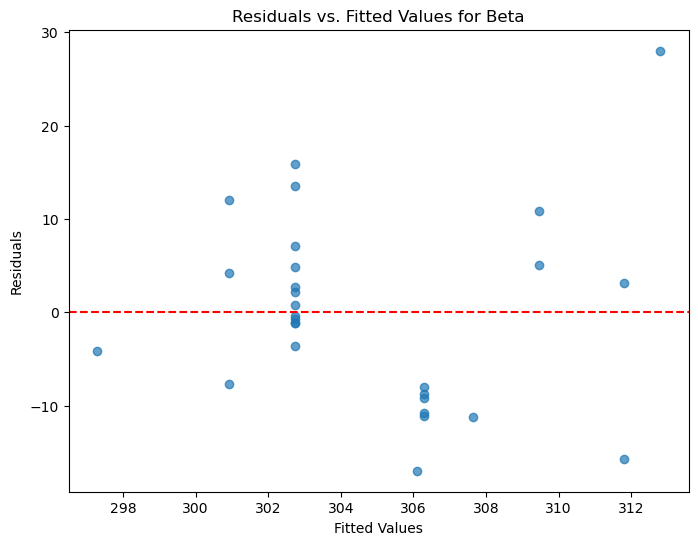

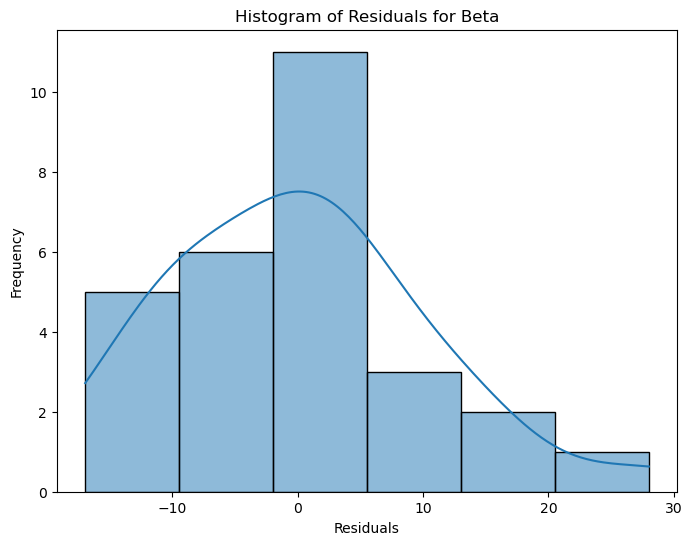

<Figure size 800x600 with 0 Axes>

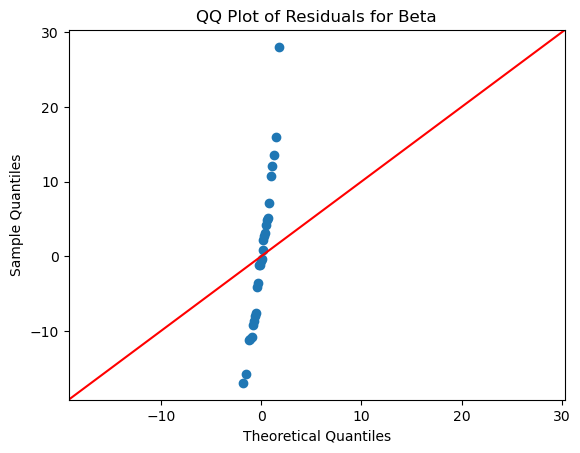

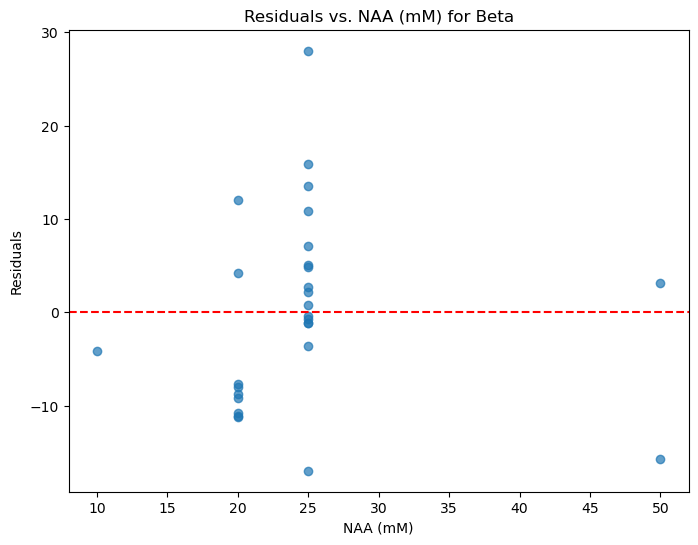

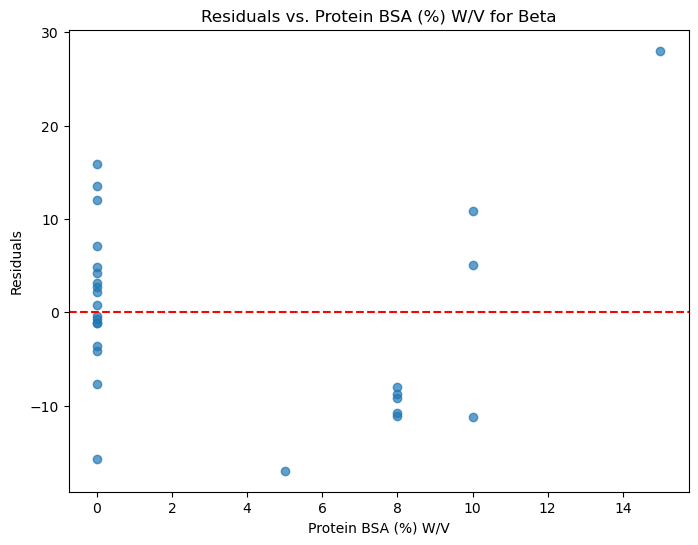

In [27]:
# Fit the model for Beta
model_beta = sm.OLS(y_beta, X).fit()
residuals_beta = model_beta.resid
fitted_beta = model_beta.fittedvalues

# 1. Residuals vs. Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_beta, residuals_beta, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for Beta')
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_beta, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Beta')
plt.show()

# 3. QQ Plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_beta, line='45')
plt.title('QQ Plot of Residuals for Beta')
plt.show()

# 4. Residuals vs. Each Predictor
predictor_names = ['NAA (mM)', 'Protein BSA (%) W/V']
for predictor in predictor_names:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[predictor], residuals_beta, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {predictor} for Beta')
    plt.show()


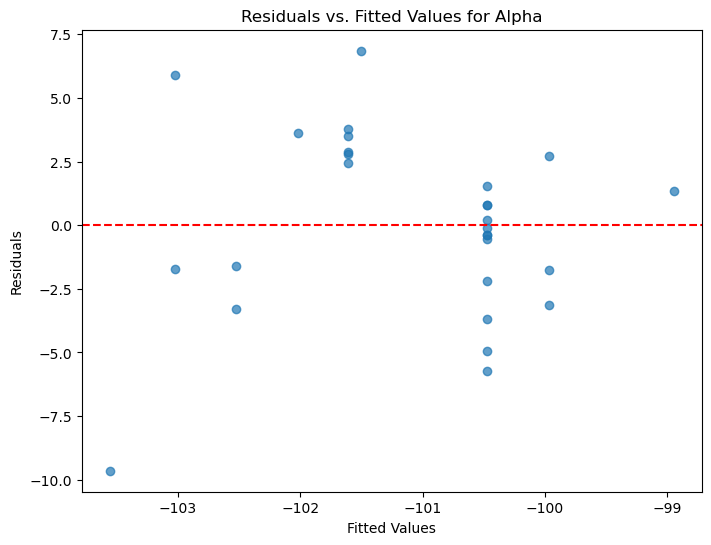

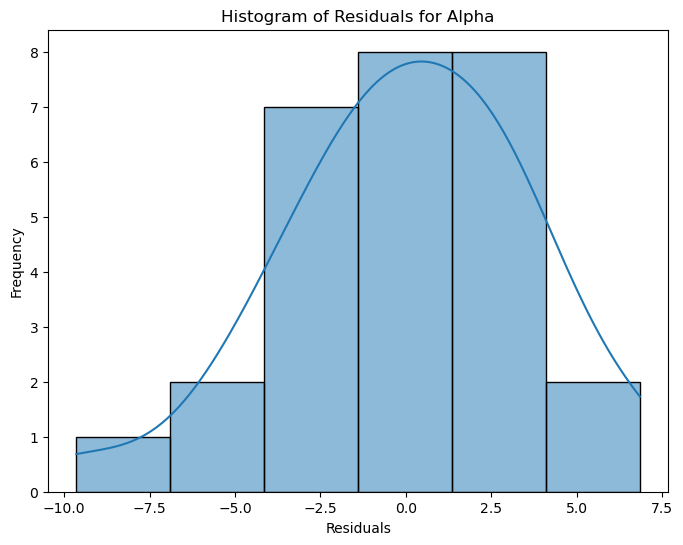

<Figure size 800x600 with 0 Axes>

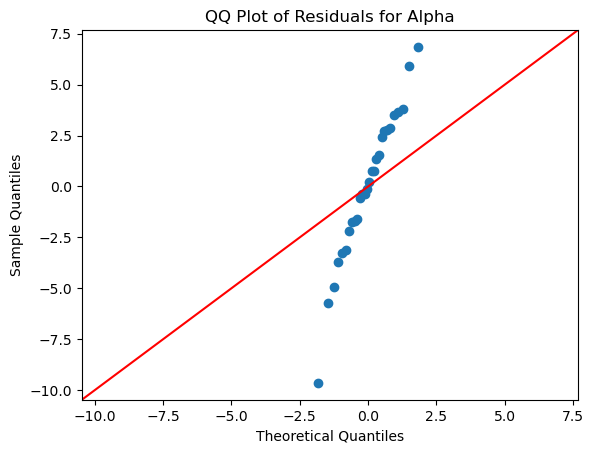

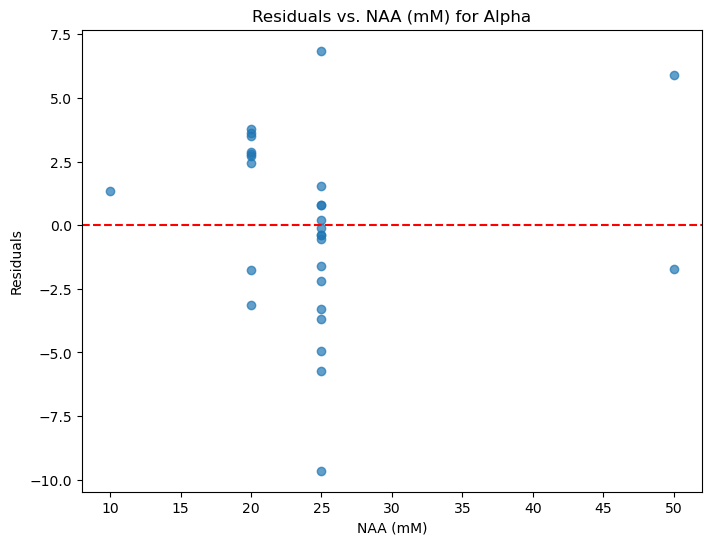

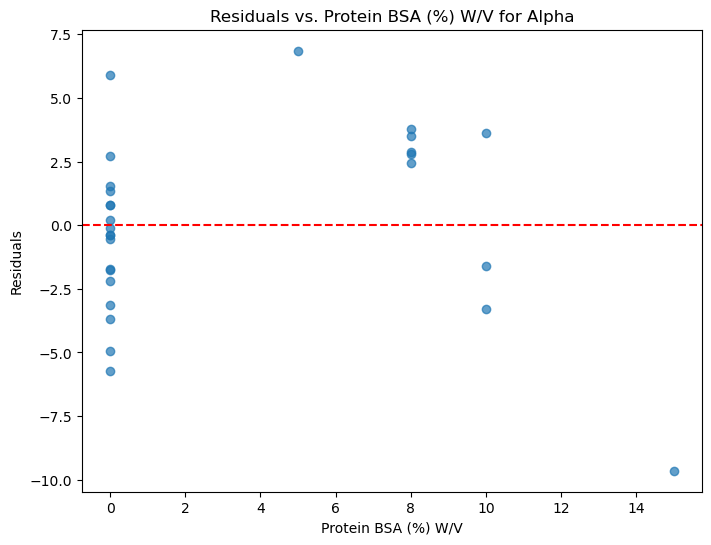

In [28]:
# Fit the model for Alpha (as an example; repeat for Beta if needed)
model_alpha = sm.OLS(y_alpha, X).fit()
residuals_alpha = model_alpha.resid
fitted_alpha = model_alpha.fittedvalues

# 1. Residuals vs. Fitted Values
plt.figure(figsize=(8, 6))
plt.scatter(fitted_alpha, residuals_alpha, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for Alpha')
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_alpha, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Alpha')
plt.show()

# 3. QQ Plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_alpha, line='45')
plt.title('QQ Plot of Residuals for Alpha')
plt.show()

# 4. Residuals vs. Each Predictor
predictor_names = ['NAA (mM)', 'Protein BSA (%) W/V']
for predictor in predictor_names:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[predictor], residuals_alpha, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {predictor} for Alpha')
    plt.show()

In [29]:
# Define predictors and target variable for Alpha
data = df[['Alpha (α)', 'Beta (β)', 'NAA (mM)', 'Protein BSA (%) W/V']].dropna()

#data = data.replace(0, 1e-10)

X_alpha = data[['NAA (mM)','Protein BSA (%) W/V']]
X_alpha = sm.add_constant(X_alpha)  # Add a constant term for the intercept
y_alpha = data['Alpha (α)']
if X_alpha.shape[0] == 0 or y_alpha.shape[0] == 0:
    raise ValueError("The data contains no rows after filtering. Check your filtering steps.")

# Fit the GLM model for Alpha using a Gamma family with a log link
glm_alpha = sm.GLM(y_alpha, X_alpha).fit()

# Print the model summary
print("GLM Model Summary for Alpha:")
print(glm_alpha.summary())



X_beta = data[['NAA (mM)','Protein BSA (%) W/V']]
X_beta = sm.add_constant(X_beta)  # Add a constant term for the intercept
y_beta = data['Beta (β)']
if X_beta.shape[0] == 0 or y_beta.shape[0] == 0:
    raise ValueError("The data contains no rows after filtering. Check your filtering steps.")

# Fit the GLM model for Alpha using a Gamma family with a log link
glm_beta = sm.GLM(y_beta, X_beta).fit()

# Print the model summary
print("GLM Model Summary for Beta:")
print(glm_beta.summary())

GLM Model Summary for Alpha:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Alpha (α)   No. Observations:                   28
Model:                            GLM   Df Residuals:                       25
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          14.178
Method:                          IRLS   Log-Likelihood:                -75.267
Date:                Wed, 06 Nov 2024   Deviance:                       354.45
Time:                        14:49:37   Pearson chi2:                     354.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.08539
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const

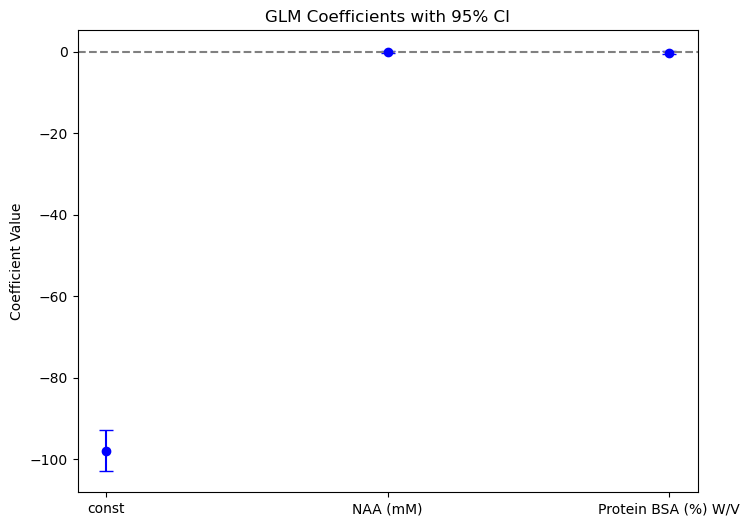

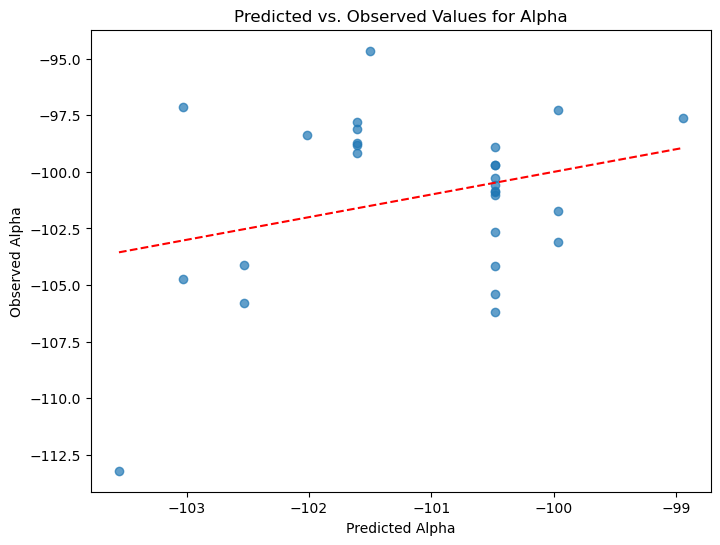

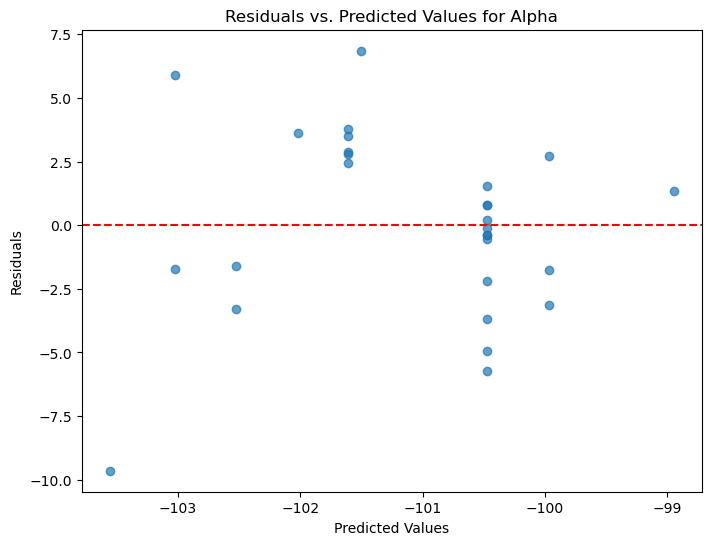

In [30]:
# Assuming glm_alpha is your fitted GLM model for Alpha

# 1. Coefficient Plot
coefs = glm_alpha.params
conf = glm_alpha.conf_int()
conf['coef'] = coefs
conf.columns = ['2.5%', '97.5%', 'coef']
plt.figure(figsize=(8, 6))
plt.errorbar(conf.index, conf['coef'], 
             yerr=[conf['coef'] - conf['2.5%'], conf['97.5%'] - conf['coef']], 
             fmt='o', capsize=5, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Coefficient Value')
plt.title('GLM Coefficients with 95% CI')
plt.show()

# 2. Predicted vs. Observed Plot
predicted_values = glm_alpha.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, data['Alpha (α)'], alpha=0.7)
plt.plot([min(predicted_values), max(predicted_values)], 
         [min(predicted_values), max(predicted_values)], 'r--')
plt.xlabel('Predicted Alpha')
plt.ylabel('Observed Alpha')
plt.title('Predicted vs. Observed Values for Alpha')
plt.show()

# 3. Residual Plot
residuals = glm_alpha.resid_response
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Alpha')
plt.show()

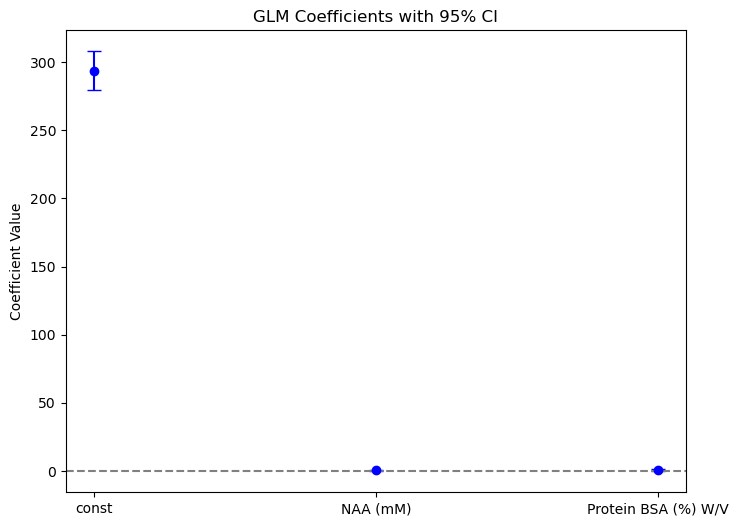

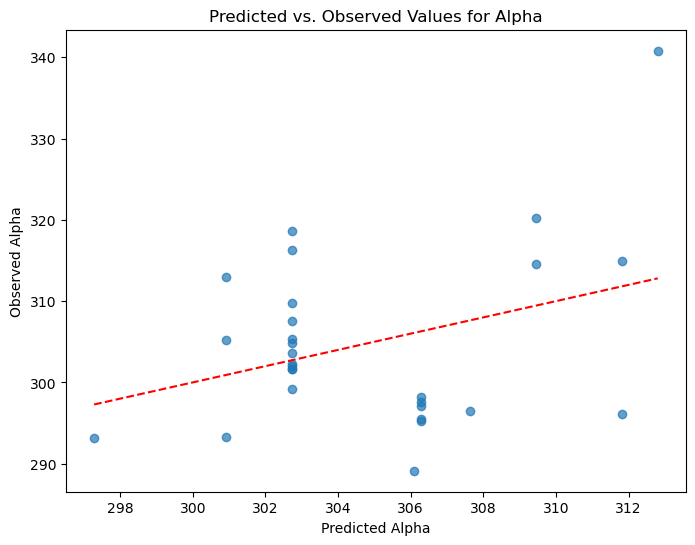

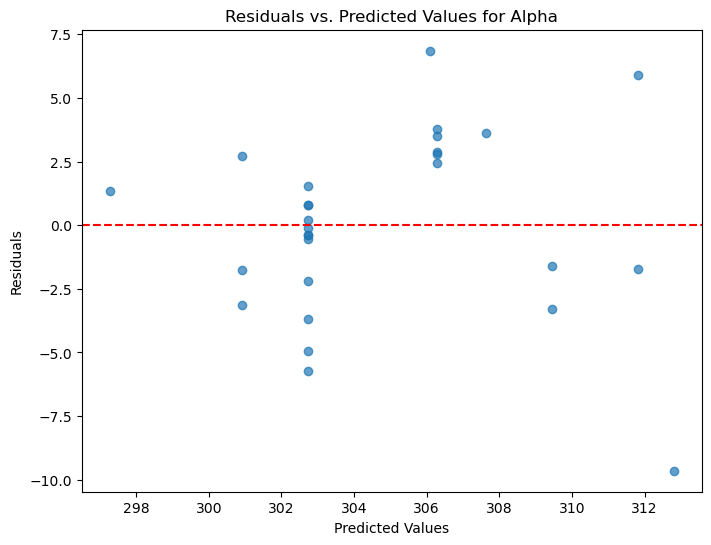

In [31]:
# Assuming glm_alpha is your fitted GLM model for Alpha

# 1. Coefficient Plot
coefs = glm_beta.params
conf = glm_beta.conf_int()
conf['coef'] = coefs
conf.columns = ['2.5%', '97.5%', 'coef']
plt.figure(figsize=(8, 6))
plt.errorbar(conf.index, conf['coef'], 
             yerr=[conf['coef'] - conf['2.5%'], conf['97.5%'] - conf['coef']], 
             fmt='o', capsize=5, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Coefficient Value')
plt.title('GLM Coefficients with 95% CI')
plt.show()

# 2. Predicted vs. Observed Plot
predicted_values = glm_beta.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, data['Beta (β)'], alpha=0.7)
plt.plot([min(predicted_values), max(predicted_values)], 
         [min(predicted_values), max(predicted_values)], 'r--')
plt.xlabel('Predicted Alpha')
plt.ylabel('Observed Alpha')
plt.title('Predicted vs. Observed Values for Alpha')
plt.show()

# 3. Residual Plot
residuals = glm_alpha.resid_response
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values for Alpha')
plt.show()

In [34]:
# Create dummy variables for each publication
study_dummies = pd.get_dummies(data['Study'], prefix='study')

# Add these to your predictor variables
X = pd.concat([X, study_dummies], axis=1)

# Run the regression with publication effects
model_alpha_pub = sm.OLS(y_alpha, X).fit()
model_beta_pub = sm.OLS(y_beta, X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [35]:
# First, let's check our data types and structure
print("Original X columns:", X.columns)
print("X data types:", X.dtypes)
print("Study dummies columns:", study_dummies.columns)
print("Study dummies data types:", study_dummies.dtypes)

# Let's try to fix the concatenation with explicit type conversion
X_numeric = X.astype(float)
study_dummies_numeric = study_dummies.astype(float)

# Now concatenate
X_combined = pd.concat([X_numeric, study_dummies_numeric], axis=1)

# Verify the final structure
print("\nFinal X_combined columns:", X_combined.columns)
print("Final data types:", X_combined.dtypes)

# Now try the regression
model_alpha_pub = sm.OLS(y_alpha, X_combined).fit()
model_beta_pub = sm.OLS(y_beta, X_combined).fit()

Original X columns: Index(['const', 'NAA (mM)', 'Protein BSA (%) W/V', 'study_Babourina2015',
       'study_Cady1995', 'study_Corbett1995', 'study_Covaciu2010',
       'study_Kuroda2003', 'study_Verius2019', 'study_Vescovo2013'],
      dtype='object')
X data types: const                  float64
NAA (mM)                 int64
Protein BSA (%) W/V      int64
study_Babourina2015       bool
study_Cady1995            bool
study_Corbett1995         bool
study_Covaciu2010         bool
study_Kuroda2003          bool
study_Verius2019          bool
study_Vescovo2013         bool
dtype: object
Study dummies columns: Index(['study_Babourina2015', 'study_Cady1995', 'study_Corbett1995',
       'study_Covaciu2010', 'study_Kuroda2003', 'study_Verius2019',
       'study_Vescovo2013'],
      dtype='object')
Study dummies data types: study_Babourina2015    bool
study_Cady1995         bool
study_Corbett1995      bool
study_Covaciu2010      bool
study_Kuroda2003       bool
study_Verius2019       bool
study

In [36]:
# Start fresh
# 1. First get your basic predictors
X_base = data[['NAA (mM)', 'Protein BSA (%) W/V']]

# 2. Create study dummies
study_dummies = pd.get_dummies(data['Study'], prefix='study')

# 3. Combine them
X_combined = pd.concat([X_base, study_dummies], axis=1)

# 4. Add constant
X_final = sm.add_constant(X_combined)

# 5. Fit models
model_alpha_pub = sm.OLS(y_alpha, X_final).fit()
model_beta_pub = sm.OLS(y_beta, X_final).fit()

# Print results
print("\nModel for Alpha with publication effects:")
print(model_alpha_pub.summary())
print("\nModel for Beta with publication effects:")
print(model_beta_pub.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [37]:
# 1. First get your basic predictors and convert to float
X_base = data[['NAA (mM)', 'Protein BSA (%) W/V']].astype(float)

# 2. Create study dummies and convert to float
study_dummies = pd.get_dummies(data['Study'], prefix='study').astype(float)

# 3. Combine them
X_combined = pd.concat([X_base, study_dummies], axis=1)

# Let's check our data before proceeding
print("X_combined dtypes:")
print(X_combined.dtypes)
print("\nShape of X_combined:", X_combined.shape)
print("\nShape of y_alpha:", y_alpha.shape)

# 4. Add constant
X_final = sm.add_constant(X_combined)

# Convert everything to numpy arrays
X_final_np = np.asarray(X_final, dtype=float)
y_alpha_np = np.asarray(y_alpha, dtype=float)
y_beta_np = np.asarray(y_beta, dtype=float)

# 5. Fit models
model_alpha_pub = sm.OLS(y_alpha_np, X_final_np).fit()
model_beta_pub = sm.OLS(y_beta_np, X_final_np).fit()

# Print results
print("\nModel for Alpha with publication effects:")
print(model_alpha_pub.summary())
print("\nModel for Beta with publication effects:")
print(model_beta_pub.summary())

X_combined dtypes:
NAA (mM)               float64
Protein BSA (%) W/V    float64
study_Babourina2015    float64
study_Cady1995         float64
study_Corbett1995      float64
study_Covaciu2010      float64
study_Kuroda2003       float64
study_Verius2019       float64
study_Vescovo2013      float64
dtype: object

Shape of X_combined: (28, 9)

Shape of y_alpha: (28,)

Model for Alpha with publication effects:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     2.905
Date:                Wed, 06 Nov 2024   Prob (F-statistic):             0.0269
Time:                        14:56:13   Log-Likelihood:                -65.327
No. Observations:                  28   AIC:                             148.7
Df Residuals:                      19

In [ ]:
# First, let's create a clean version of the data with simplified column names
clean_data = data.copy()
clean_data.columns = [col.replace('(α)', 'alpha')
                        .replace('(β)', 'beta')
                        .replace('(mM)', '_mM')
                        .replace('(%) W/V', '_pct')
                        .replace(' ', '_') for col in data.columns]

In [46]:
# Now let's try the mixed model with the correct column names
formula_alpha = "Alpha_alpha ~ NAA__mM + Protein_BSA__pct"
formula_beta = "Beta_beta ~ NAA__mM + Protein_BSA__pct"

# For alpha
model_alpha_mixed = mix.MixedLM.from_formula(
    formula_alpha, 
    groups="Study",
    data=clean_data
)

# For beta
model_beta_mixed = mix.MixedLM.from_formula(
    formula_beta, 
    groups="Study",
    data=clean_data
)

# Fit the models
results_alpha = model_alpha_mixed.fit()
results_beta = model_beta_mixed.fit()

# Print results
print("\nMixed Model Results for Alpha:")
print(results_alpha.summary())
print("\nMixed Model Results for Beta:")
print(results_beta.summary())


Mixed Model Results for Alpha:
             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   Alpha_alpha
No. Observations:    28        Method:               REML       
No. Groups:          7         Scale:                8.7165     
Min. group size:     1         Log-Likelihood:       -74.1461   
Max. group size:     11        Converged:            Yes        
Mean group size:     4.0                                        
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|  [0.025   0.975]
----------------------------------------------------------------
Intercept        -98.277    3.178 -30.925 0.000 -104.506 -92.048
NAA__mM           -0.069    0.105  -0.654 0.513   -0.274   0.137
Protein_BSA__pct  -0.353    0.152  -2.325 0.020   -0.650  -0.055
Study Var          8.148    2.817                               


Mixed Model Results for Beta:
            Mixed Linear Model Regressio

In [44]:
# Print the column names to see what we're working with
print("Column names in clean_data:")
print(clean_data.columns)


Column names in clean_data:
Index(['Alpha_alpha', 'Beta_beta', 'NAA__mM', 'Protein_BSA__pct', 'Study'], dtype='object')


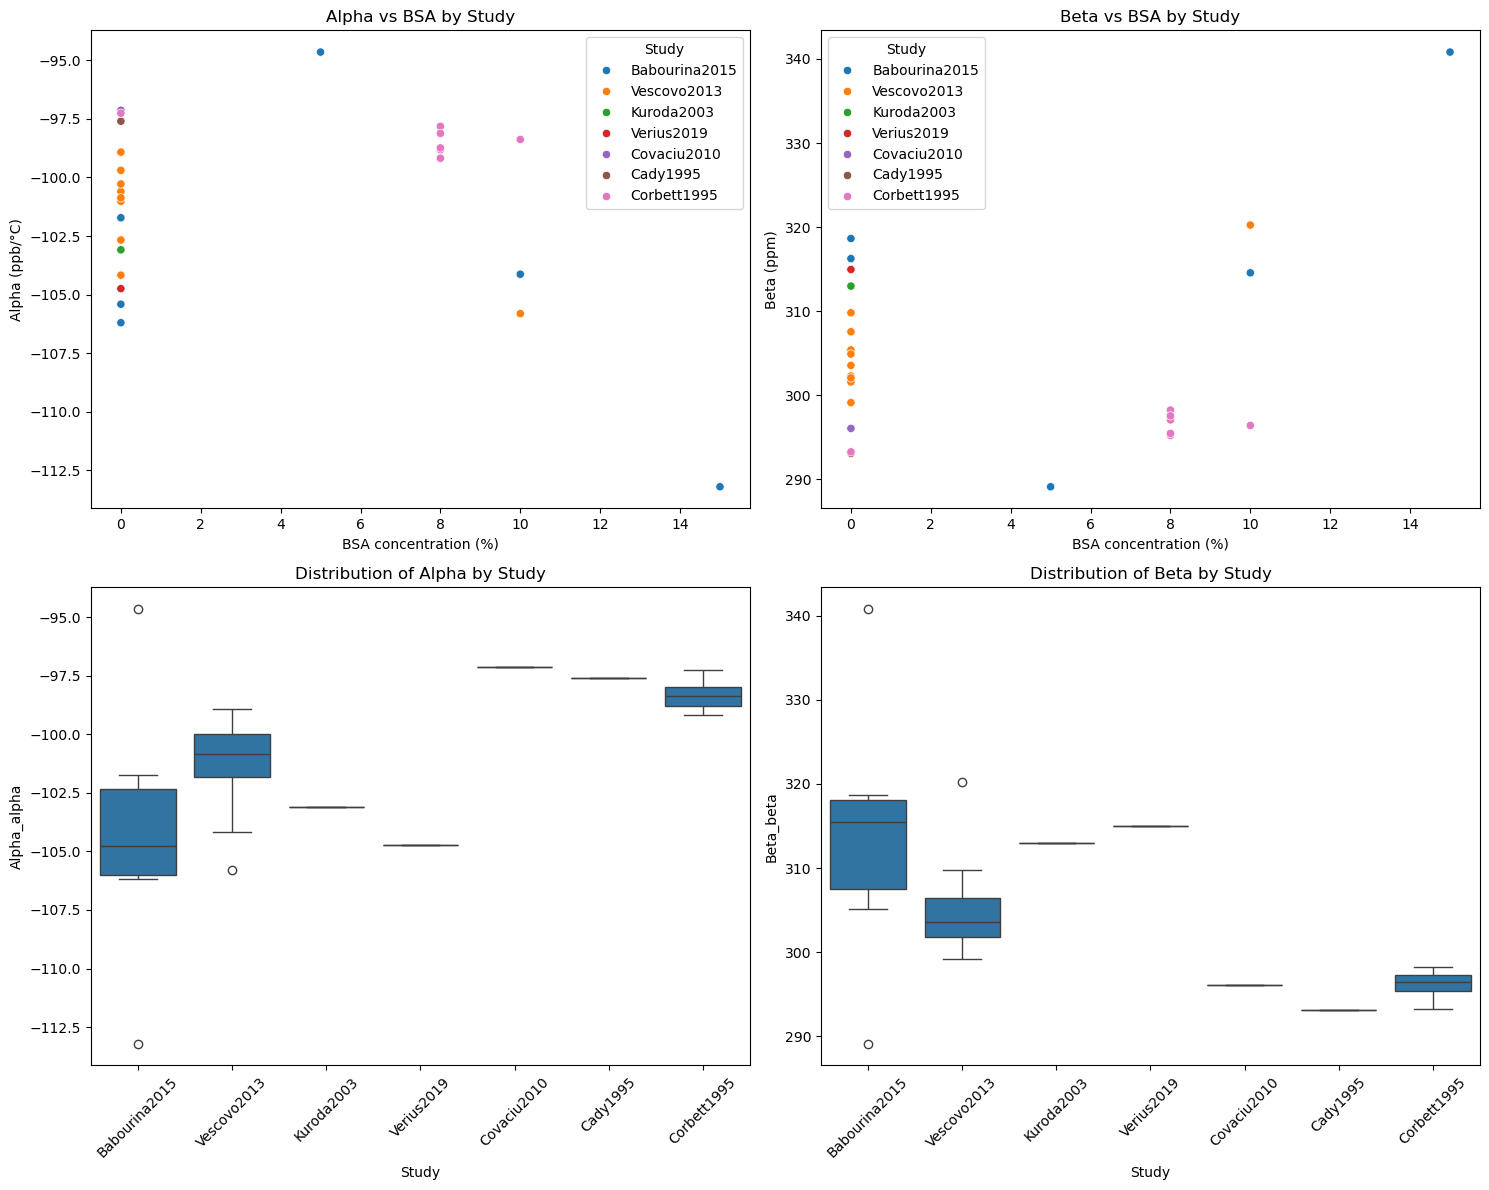

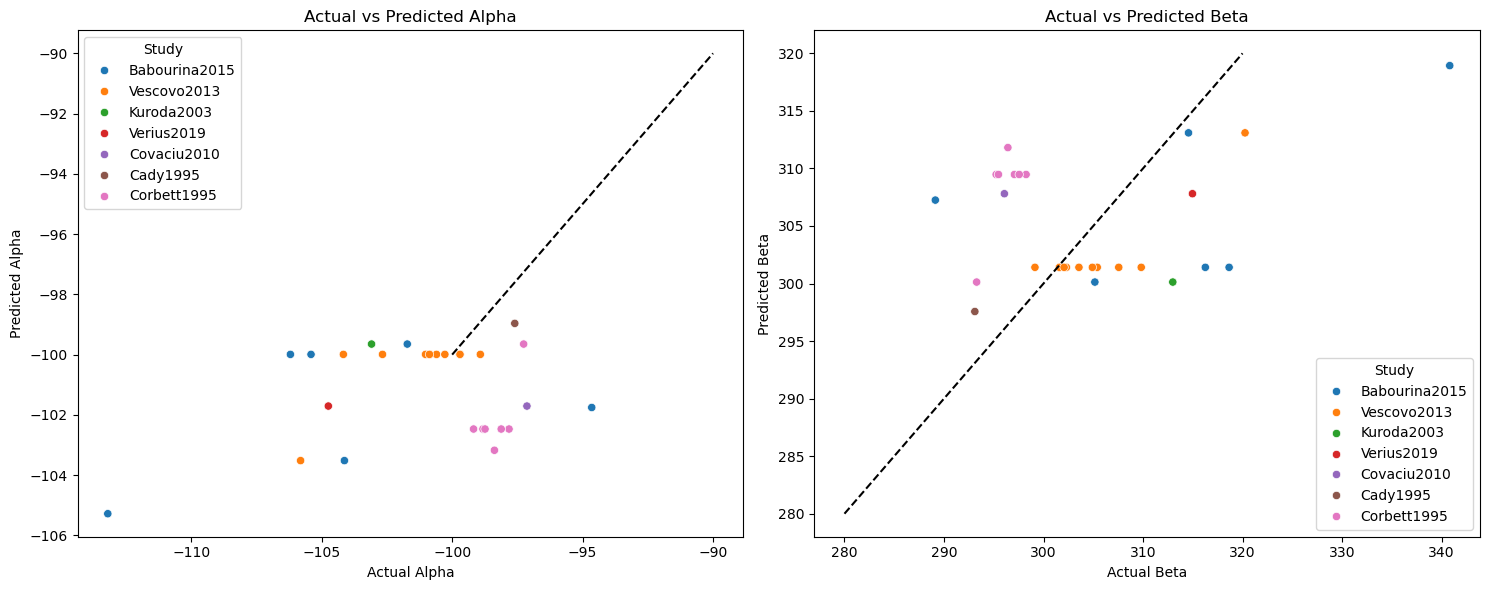

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots without the seaborn style
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Alpha vs BSA with Study groups
sns.scatterplot(data=clean_data, 
                x='Protein_BSA__pct', 
                y='Alpha_alpha',
                hue='Study',
                ax=ax1)
ax1.set_title('Alpha vs BSA by Study')
ax1.set_xlabel('BSA concentration (%)')
ax1.set_ylabel('Alpha (ppb/°C)')

# 2. Beta vs BSA with Study groups
sns.scatterplot(data=clean_data, 
                x='Protein_BSA__pct', 
                y='Beta_beta',
                hue='Study',
                ax=ax2)
ax2.set_title('Beta vs BSA by Study')
ax2.set_xlabel('BSA concentration (%)')
ax2.set_ylabel('Beta (ppm)')

# 3. Box plots of Alpha by Study
sns.boxplot(data=clean_data,
            x='Study',
            y='Alpha_alpha',
            ax=ax3)
ax3.set_title('Distribution of Alpha by Study')
ax3.tick_params(axis='x', rotation=45)

# 4. Box plots of Beta by Study
sns.boxplot(data=clean_data,
            x='Study',
            y='Beta_beta',
            ax=ax4)
ax4.set_title('Distribution of Beta by Study')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional plot for the random effects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Calculate predicted values
predicted_alpha = results_alpha.predict()
predicted_beta = results_beta.predict()

# Plot actual vs predicted
sns.scatterplot(x=clean_data['Alpha_alpha'], 
                y=predicted_alpha,
                hue=clean_data['Study'],
                ax=ax1)
ax1.set_title('Actual vs Predicted Alpha')
ax1.set_xlabel('Actual Alpha')
ax1.set_ylabel('Predicted Alpha')
ax1.plot([-100, -90], [-100, -90], 'k--')  # identity line

sns.scatterplot(x=clean_data['Beta_beta'], 
                y=predicted_beta,
                hue=clean_data['Study'],
                ax=ax2)
ax2.set_title('Actual vs Predicted Beta')
ax2.set_xlabel('Actual Beta')
ax2.set_ylabel('Predicted Beta')
ax2.plot([280, 320], [280, 320], 'k--')  # identity line

plt.tight_layout()
plt.show()

In [51]:
# Model with random slopes
formula_alpha_interaction = "Alpha_alpha ~ NAA__mM + Protein_BSA__pct"
model_alpha_mixed_interaction = mix.MixedLM.from_formula(
   formula_alpha_interaction, 
   groups="Study",
   data=clean_data,
   re_formula="~NAA__mM + Protein_BSA__pct"  # This adds random slopes
)

formula_beta_interaction = "Beta_beta ~ NAA__mM + Protein_BSA__pct"
model_beta_mixed_interaction = mix.MixedLM.from_formula(
   formula_beta_interaction, 
   groups="Study",
   data=clean_data,
   re_formula="~NAA__mM + Protein_BSA__pct"  # This adds random slopes
)

# Fit the models
results_alpha_interaction = model_alpha_mixed_interaction.fit()
results_beta_interaction = model_beta_mixed_interaction.fit()

print("\nMixed Model Results for Alpha with interactions:")
print(results_alpha_interaction.summary())
print("\nMixed Model Results for Beta with interactions:")
print(results_beta_interaction.summary())


Mixed Model Results for Alpha with interactions:
                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        Alpha_alpha
No. Observations:        28             Method:                    REML       
No. Groups:              7              Scale:                     8.2863     
Min. group size:         1              Log-Likelihood:            -75.9931   
Max. group size:         11             Converged:                 No         
Mean group size:         4.0                                                  
------------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z|  [0.025   0.975]
------------------------------------------------------------------------------
Intercept                      -99.288    3.581 -27.723 0.000 -106.307 -92.268
NAA__mM                         -0.064    0.143  -0.446 0.655   -0.344   0.216
Protein_BSA__pct       

/Users/c3495249/miniconda3/envs/preprocess_env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/c3495249/miniconda3/envs/preprocess_env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/c3495249/miniconda3/envs/preprocess_env/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/c3495249/miniconda3/envs/preprocess_env/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/Users/c3495249/miniconda3/envs/preprocess_env/lib/python3.11/site-packages/s